In [1]:
# This script uses OSMnx to generate the road network data for select Virginia municipalities

# Importing required modules

import pandas as pd
import numpy as np
import osmnx as ox
import networkx as nx
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib import pyplot as plt
import geopandas as gpd
import math
from shapely.geometry import LineString

In [2]:
# Defining project directory

direc = 'D:/accidental_effect/'
direc = 'C:/Users/macary/Documents/accidental_effect/'

In [3]:
# Get the road networks and add properties

H = ox.graph_from_place('Harrisonburg, Virginia, USA', network_type = 'drive')
S = ox.graph_from_place('Staunton, Virginia, USA', network_type = 'drive')
W = ox.graph_from_place('Winchester, Virginia, USA', network_type = 'drive')

# Impute speed on all edges missing data

H = ox.add_edge_speeds(H)
S = ox.add_edge_speeds(S)
W = ox.add_edge_speeds(W)

# Calculate travel time (seconds) for all edges

H = ox.add_edge_travel_times(H)
S = ox.add_edge_travel_times(S)
W = ox.add_edge_travel_times(W)

# Ensure that it is strongly connected

H = ox.utils_graph.truncate.largest_component(H, strongly = True)
S = ox.utils_graph.truncate.largest_component(S, strongly = True)
W = ox.utils_graph.truncate.largest_component(W, strongly = True)

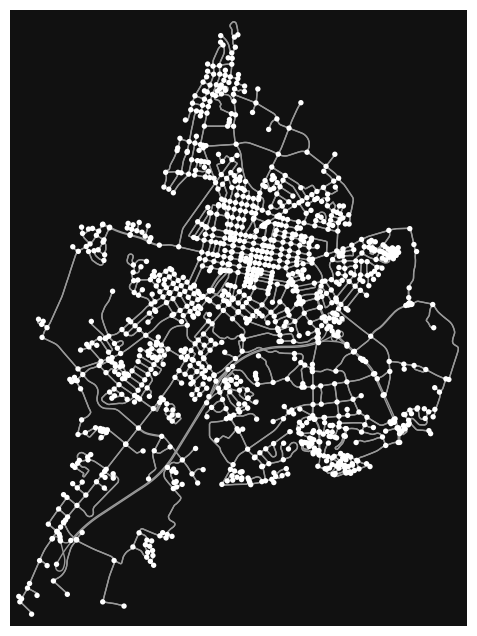

In [4]:
# Create a network figure for Harrisonburg

fig, ax = ox.plot_graph(H)
fig.savefig(direc + 'figures/Harrisonburg__network.eps')
fig.savefig(direc + 'figures/Harrisonburg__network.png')

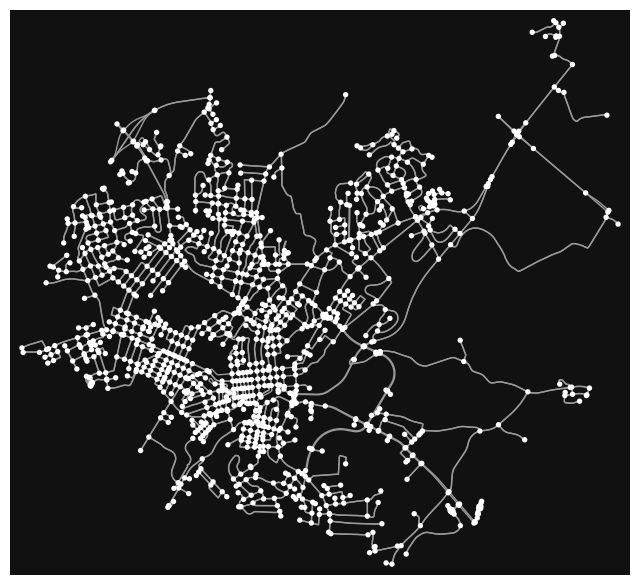

In [5]:
# Create a network figure for Staunton

fig, ax = ox.plot_graph(S)
fig.savefig(direc + 'figures/Staunton__network.eps')
fig.savefig(direc + 'figures/Staunton__network.png')

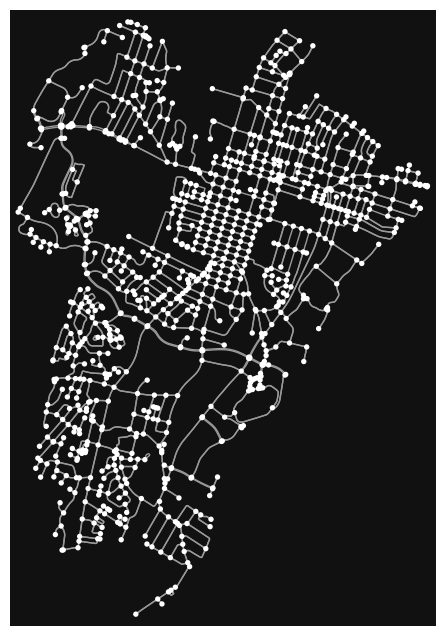

In [6]:
# Create a network figure for Winchester

fig, ax = ox.plot_graph(W)
fig.savefig(direc + 'figures/Winchester__network.eps')
fig.savefig(direc + 'figures/Winchester__network.png')

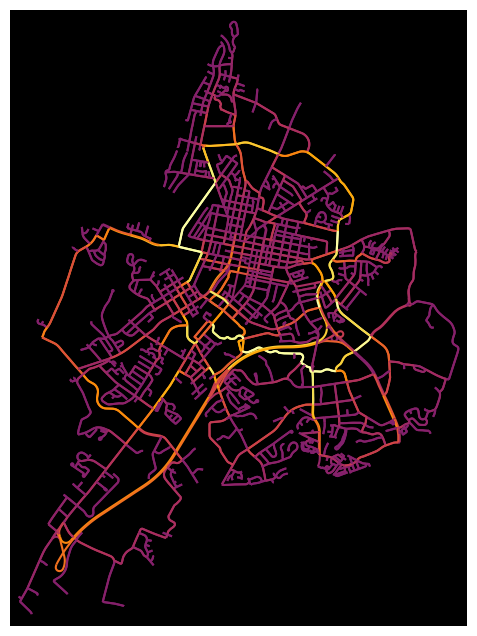

In [7]:
# Create an edge centrality figure for Harrisonburg

ebc_h = nx.betweenness_centrality(nx.line_graph(H))
ev = [ebc_h[edge + (0,)] for edge in H.edges()]
norm = colors.Normalize(vmin = min(ev)*0.8, vmax = max(ev))
cmap = cm.ScalarMappable(norm = norm, cmap = cm.inferno)
ec = [cmap.to_rgba(cl+.03) for cl in ev]
fig, ax = ox.plot_graph(H, bgcolor = 'k', node_size = 0, node_color = 'w',
                        node_edgecolor = 'gray', node_zorder = 2, edge_color = ec,
                        edge_linewidth = 1.5, edge_alpha = 1)
fig.savefig(direc + 'figures/Harrisonburg__edge_centrality.eps')
fig.savefig(direc + 'figures/Harrisonburg__edge_centrality.png')

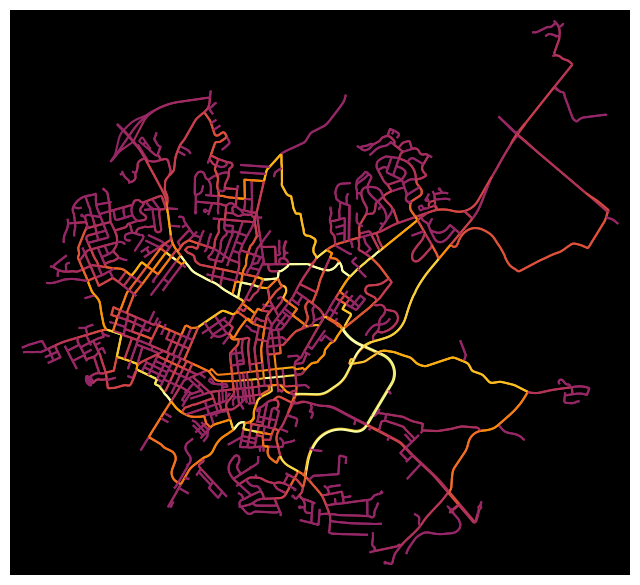

In [8]:
# Create an edge centrality figure for Staunton

ebc_s = nx.betweenness_centrality(nx.line_graph(S))
ev = [ebc_s[edge + (0,)] for edge in S.edges()]
norm = colors.Normalize(vmin = min(ev)*0.8, vmax = max(ev))
cmap = cm.ScalarMappable(norm = norm, cmap = cm.inferno)
ec = [cmap.to_rgba(cl+.03) for cl in ev]
fig, ax = ox.plot_graph(S, bgcolor = 'k', node_size = 0, node_color = 'w',
                        node_edgecolor = 'gray', node_zorder = 2, edge_color = ec,
                        edge_linewidth = 1.5, edge_alpha = 1)
fig.savefig(direc + 'figures/Staunton__edge_centrality.eps')
fig.savefig(direc + 'figures/Staunton__edge_centrality.png')

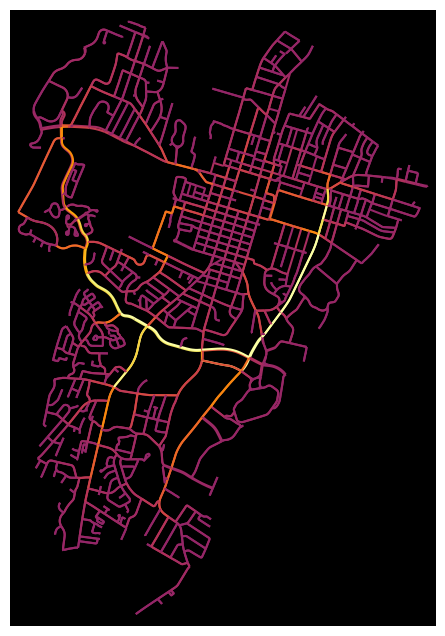

In [9]:
# Create an edge centrality figure for Winchester

ebc_w = nx.betweenness_centrality(nx.line_graph(W))
ev = [ebc_w[edge + (0,)] for edge in W.edges()]
norm = colors.Normalize(vmin = min(ev)*0.8, vmax = max(ev))
cmap = cm.ScalarMappable(norm = norm, cmap = cm.inferno)
ec = [cmap.to_rgba(cl+.06) for cl in ev]
fig, ax = ox.plot_graph(W, bgcolor = 'k', node_size = 0, node_color = 'w',
                        node_edgecolor = 'gray', node_zorder = 2, edge_color = ec,
                        edge_linewidth = 1.5, edge_alpha = 1)
fig.savefig(direc + 'figures/Winchester__edge_centrality.eps')
fig.savefig(direc + 'figures/Winchester__edge_centrality.png')

In [10]:
# Extract remaining desired road network data for each city

cc_h = list(nx.closeness_centrality(nx.line_graph(H)).values())
cc_s = list(nx.closeness_centrality(nx.line_graph(S)).values())
cc_w = list(nx.closeness_centrality(nx.line_graph(W)).values())

speed_h = [list(H.edges.data())[i][2]['speed_kph'] for i in range(len(H.edges))]
speed_s = [list(S.edges.data())[i][2]['speed_kph'] for i in range(len(S.edges))]
speed_w = [list(W.edges.data())[i][2]['speed_kph'] for i in range(len(W.edges))]

way_h = [list(H.edges.data())[i][2]['oneway'] for i in range(len(H.edges))]
way_s = [list(S.edges.data())[i][2]['oneway'] for i in range(len(S.edges))]
way_w = [list(W.edges.data())[i][2]['oneway'] for i in range(len(W.edges))]

high_h = [list(H.edges.data())[i][2]['highway'] for i in range(len(H.edges))]
high_s = [list(S.edges.data())[i][2]['highway'] for i in range(len(S.edges))]
high_w = [list(W.edges.data())[i][2]['highway'] for i in range(len(W.edges))]

In [11]:
# Identify the centroids of the road segments

h_centroids = []
s_centroids = []
w_centroids = []

for i in range(len(H.edges)):
    
    try:
    
        x = LineString(list(H.edges.data())[i][2]['geometry']).centroid.x
        y = LineString(list(H.edges.data())[i][2]['geometry']).centroid.y
        h_centroids.append((x,y))

    except:

        h_centroids.append(None)

for i in range(len(S.edges)):
    
    try:
    
        x = LineString(list(S.edges.data())[i][2]['geometry']).centroid.x
        y = LineString(list(S.edges.data())[i][2]['geometry']).centroid.y
        s_centroids.append((x,y))

    except:

        s_centroids.append(None)

for i in range(len(W.edges)):
    
    try:
    
        x = LineString(list(W.edges.data())[i][2]['geometry']).centroid.x
        y = LineString(list(W.edges.data())[i][2]['geometry']).centroid.y
        w_centroids.append((x,y))

    except:

        w_centroids.append(None)

In [13]:
# Create dataframes

hdf = pd.concat([pd.Series(list(ebc_h), name = 'EBC'), pd.Series(cc_h, name = 'CC'), pd.Series(speed_h, name = 'Speed'), pd.Series(way_h, name = 'Oneway'), pd.Series(high_h, name = 'Highway_Type'), pd.Series(h_centroids, name = 'Centroid')], axis = 1)
sdf = pd.concat([pd.Series(list(ebc_s), name = 'EBC'), pd.Series(cc_s, name = 'CC'), pd.Series(speed_s, name = 'Speed'), pd.Series(way_s, name = 'Oneway'), pd.Series(high_s, name = 'Highway_Type'), pd.Series(s_centroids, name = 'Centroid')], axis = 1)
wdf = pd.concat([pd.Series(list(ebc_w), name = 'EBC'), pd.Series(cc_w, name = 'CC'), pd.Series(speed_w, name = 'Speed'), pd.Series(way_w, name = 'Oneway'), pd.Series(high_w, name = 'Highway_Type'), pd.Series(w_centroids, name = 'Centroid')], axis = 1)

In [14]:
# Read in the house data

har = pd.read_csv(direc + 'data/harrisonburg_clean.csv')
sta = pd.read_csv(direc + 'data/staunton_clean.csv')
win = pd.read_csv(direc + 'data/winchester_clean.csv')

In [15]:
# Define a function for handling NoneType centroid data

def maybe(huh):

    if huh == None:

        huh = (37,-70)
        
    return huh

In [ ]:
# Find the nearest road segment to each house

h_nearest = []
s_nearest = []
w_nearest = []

h_check = []
s_check = []
w_check = []

for i in range(len(har)):

    dists = [math.dist((har.longitude[i], har.latitude[i]), maybe(hdf.Centroid[j])) for j in range(len(hdf))]
    idx = dists.index(min(dists))
    h_nearest.append(idx)
    h_check.append(min(dists))

for i in range(len(sta)):

    dists = [math.dist((sta.longitude[i], sta.latitude[i]), maybe(sdf.Centroid[j])) for j in range(len(sdf))]
    idx = dists.index(min(dists))
    s_nearest.append(idx)
    s_check.append(min(dists))

for i in range(len(win)):

    dists = [math.dist((win.longitude[i], win.latitude[i]), maybe(wdf.Centroid[j])) for j in range(len(wdf))]
    idx = dists.index(min(dists))
    w_nearest.append(idx)
    w_check.append(min(dists))

In [37]:
# Adding this data to the dataframes

har = pd.concat([har, pd.Series(h_nearest, name = 'Segment_ID'), pd.Series(h_check, name = 'Distance_to_Segment')], axis = 1)
sta = pd.concat([sta, pd.Series(s_nearest, name = 'Segment_ID'), pd.Series(s_check, name = 'Distance_to_Segment')], axis = 1)
win = pd.concat([win, pd.Series(w_nearest, name = 'Segment_ID'), pd.Series(w_check, name = 'Distance_to_Segment')], axis = 1)

In [10]:
# Adding the road segment data to the housing dataframes

h_ebc = [list(ebc_h)[har.Segment_ID[i]] for i in range(len(har))]
h_cc = [cc_h[har.Segment_ID[i]] for i in range(len(har))]
h_kph = [speed_h[har.Segment_ID[i]] for i in range(len(har))]
h_one = [way_h[har.Segment_ID[i]] for i in range(len(har))]
h_type = [high_h[har.Segment_ID[i]] for i in range(len(har))]

s_ebc = [list(ebc_s)[sta.Segment_ID[i]] for i in range(len(sta))]
s_cc = [cc_s[sta.Segment_ID[i]] for i in range(len(sta))]
s_kph = [speed_s[sta.Segment_ID[i]] for i in range(len(sta))]
s_one = [way_s[sta.Segment_ID[i]] for i in range(len(sta))]
s_type = [high_s[sta.Segment_ID[i]] for i in range(len(sta))]

w_ebc = [list(ebc_w)[win.Segment_ID[i]] for i in range(len(win))]
w_cc = [cc_w[win.Segment_ID[i]] for i in range(len(win))]
w_kph = [speed_w[win.Segment_ID[i]] for i in range(len(win))]
w_one = [way_w[win.Segment_ID[i]] for i in range(len(win))]
w_type = [high_w[win.Segment_ID[i]] for i in range(len(win))]

har = pd.concat([har, pd.Series(h_ebc, name = 'EBC'), pd.Series(h_cc, name = 'CC'), pd.Series(h_kph, name = 'Speed'), pd.Series(h_one, name = 'Oneway'), pd.Series(h_type, name = 'Highway_Type')], axis = 1)
sta = pd.concat([sta, pd.Series(s_ebc, name = 'EBC'), pd.Series(s_cc, name = 'CC'), pd.Series(s_kph, name = 'Speed'), pd.Series(s_one, name = 'Oneway'), pd.Series(s_type, name = 'Highway_Type')], axis = 1)
win = pd.concat([win, pd.Series(w_ebc, name = 'EBC'), pd.Series(w_cc, name = 'CC'), pd.Series(w_kph, name = 'Speed'), pd.Series(w_one, name = 'Oneway'), pd.Series(w_type, name = 'Highway_Type')], axis = 1)

NameError: name 'ebc_h' is not defined

In [40]:
# Save dataframes

hdf.to_csv(direc + 'data/hdf.csv', index = False)
sdf.to_csv(direc + 'data/sdf.csv', index = False)
wdf.to_csv(direc + 'data/wdf.csv', index = False)

har.to_csv(direc + 'data/harrisonburg_clean.csv', index = False)
sta.to_csv(direc + 'data/staunton_clean.csv', index = False)
win.to_csv(direc + 'data/winchester_clean.csv', index = False)